# Outline;
  + What is Data science
  + What is ML
  + interactive Ex. with real dataset
  + looking ahead;, resources and so on

# Data Science.
 
  + The process of **Gathering, analyzing**, and **Interpreting** data to unconver patterns, make informed **Decesion**, and predict future Outcomes.

  + A Multidisiplinary Field that combine Statistics, data analysis, and ML

  + Lots of real world application, **Rout Optimization, Revenue Forcasting, Election result** etc.

 ## Typical Data Science Workflow
  
  1. Define Problem
  
  2. Data Collection
  
  3. Data Cleaning and processing
  
  4. Expolitary data analysis (EDA)
  
  5. Feature Engineering
  
  6. Model Develepment
  
  7. Model Evaluation
  
  8. Deplyment
  
  9. Monitoring and Iteration

# Machine Learning;
 + GOAL:
   - limitate the way that humans learn to gradually improve accuracy.
 
 
 + the application **of stastical, mathamatical, and numerical techniqes to derive some form of knowladge from DATA**

 + Dependent on human intervention, (Ex. determine the set of features, understanding data input)

 + 



### Machine larning subset
 
   + Supervised Learning
   + UnSupervised Learning
   + Reinforcment Learning

 [READ more on google about 3 subset]

# ==============================================================

# Exploitart Data Analysis (EDA)

In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

/home/dkcode/miniconda3/envs/tfenv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
#load data
df = pd.read_csv("spotify-2023.csv", encoding='latin1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# summury Staistics for neumarical features
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [5]:
# check for missing val
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [7]:
# Drop null val
df.dropna(subset=["key", "in_shazam_charts"], inplace=True) # inplace True cos itll not create another df
df.isnull().sum() # check the op is correctly done or not 

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

#### Understanding the Distribution of Key features
 + correlation matrix is a table that displays the **pairwise correlation coefficients between multiple variables in a dataset**. Each cell in the matrix **represents the degree and direction of the linear relationship between two variables,** typically measured using Pearson's correlation coefficient,

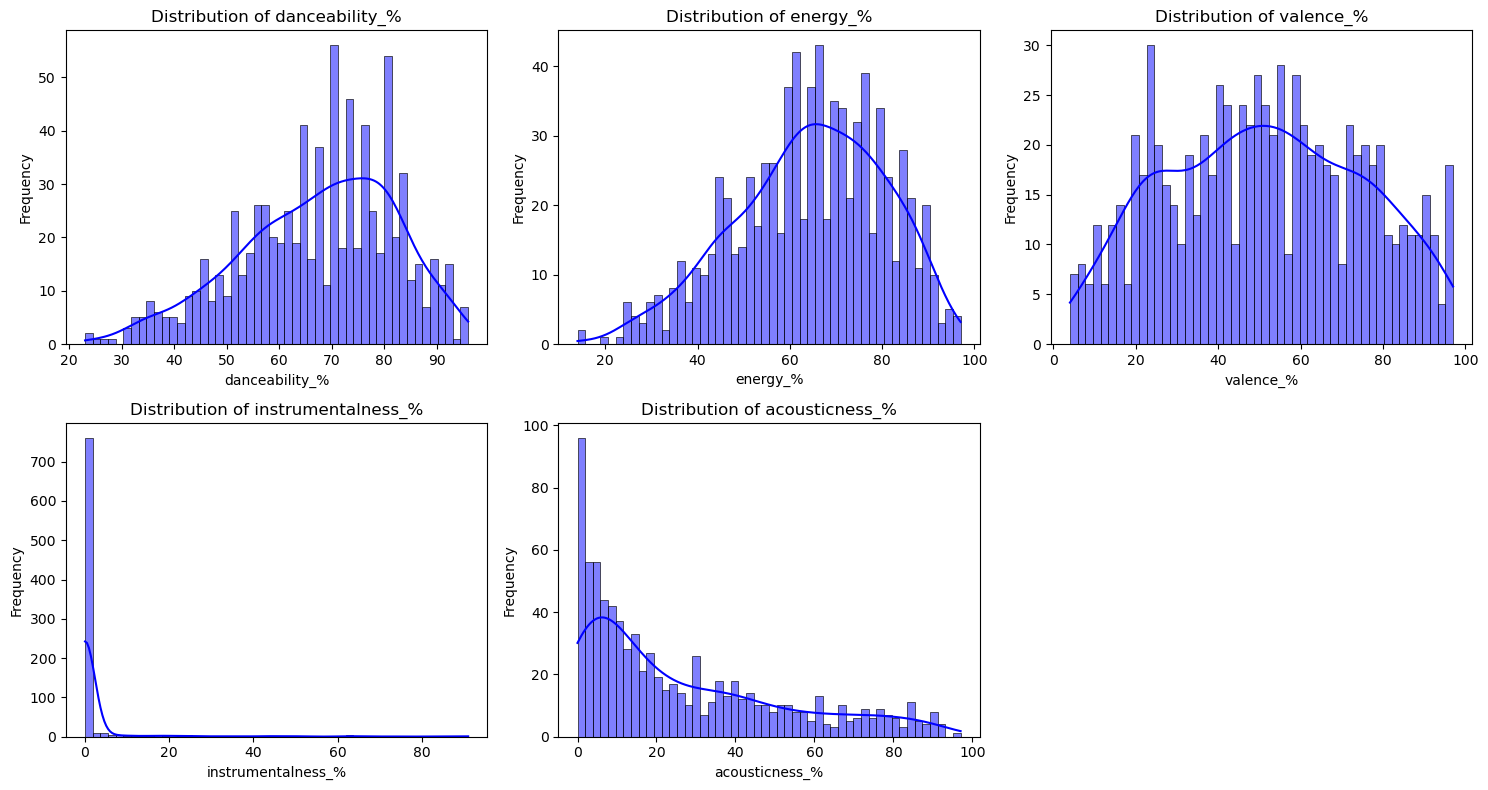

In [13]:
featureToPlot = ["danceability_%", 'energy_%', 'valence_%', 'instrumentalness_%','acousticness_%']
plt.figure(figsize=(15, 8))
for i, column in enumerate(featureToPlot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, color="blue", bins=50)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Correalation Heatmap

In [14]:
plt.figure(figsize=(8, 5))
correlationMat = df[["danceability_%", 'energy_%', 'streams']].corr()
sns.heatmap(correlationMat, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("correlation Between Featurs")
plt.show()

ValueError: could not convert string to float: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

<Figure size 800x500 with 0 Axes>

In [16]:
# Check for dtype to debug
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Since Streams is a Object we gotta Convert in to int

In [18]:
# convert streams into int
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

df['streams'].dtype

dtype('float64')

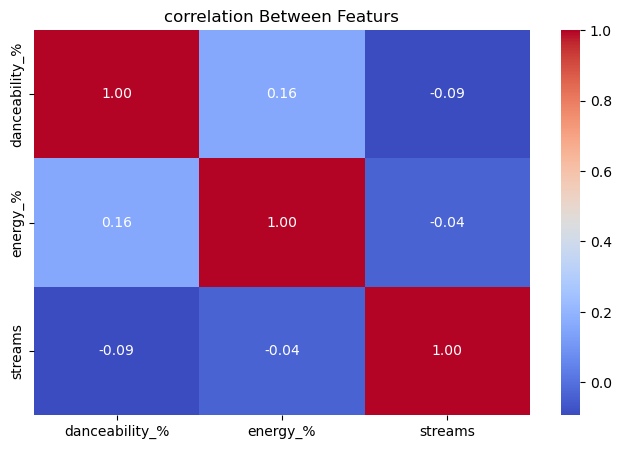

In [19]:
# running heatmap again with debuged data
plt.figure(figsize=(8, 5))
correlationMat = df[["danceability_%", 'energy_%', 'streams']].corr()
sns.heatmap(correlationMat, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("correlation Between Featurs")
plt.show()

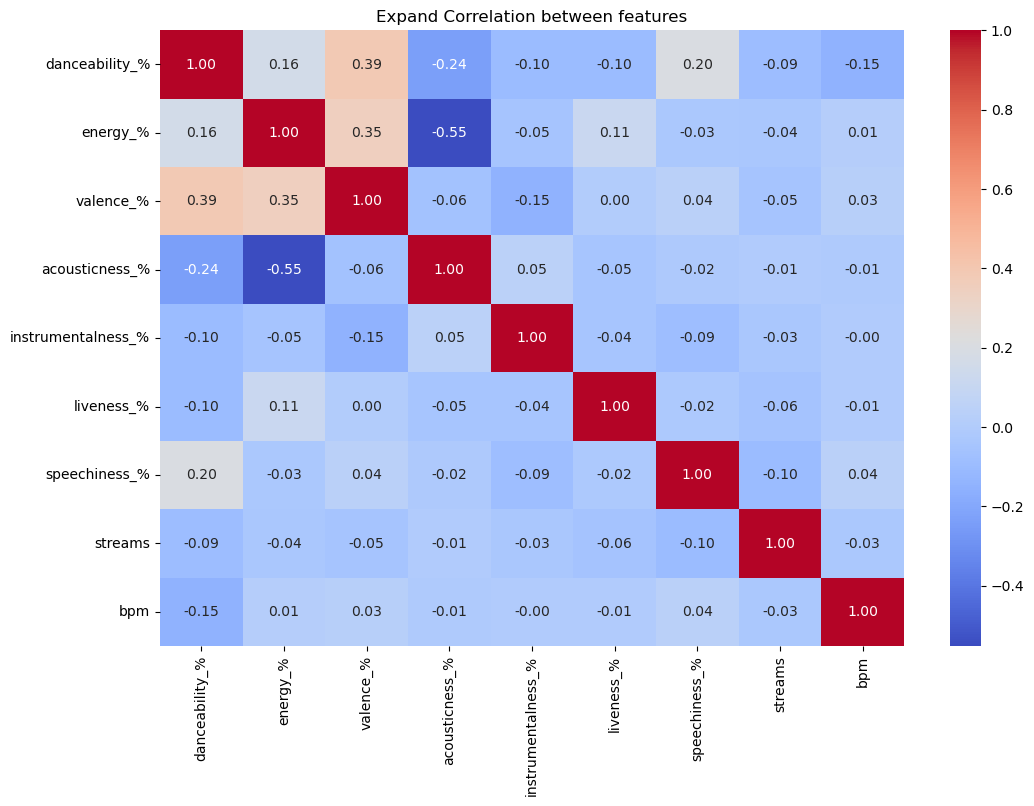

In [22]:
neumericleColumn = [   
    "danceability_%", 'energy_%', 'valence_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams', 'bpm' 
]

for col in neumericleColumn:
    df[col] = pd.to_numeric(df[col], errors='coerce')

correlatinMat = df[neumericleColumn].corr()

#plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlatinMat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Expand Correlation between features")
plt.show()

# ========================================================

# Modeling.

cluster
1    437
0    330
2    186
Name: count, dtype: int64


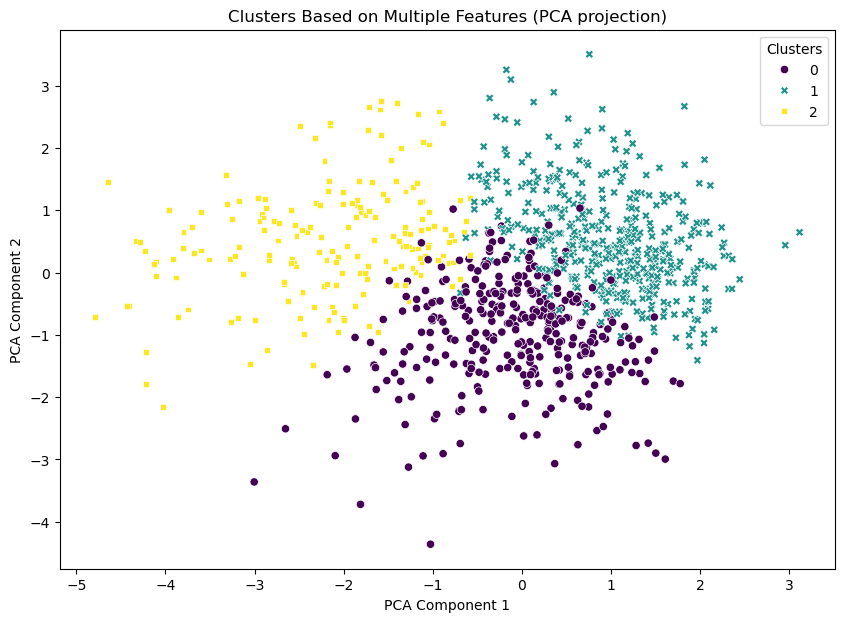

In [6]:
featureForClustering = [
    "danceability_%", 'energy_%', 'valence_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm' 
]

scaler = StandardScaler()
xScaled = scaler.fit_transform(df[featureForClustering])

kmeans = KMeans(n_clusters=3, random_state=50)
df['cluster'] = kmeans.fit_predict(xScaled)

#cluster siz
print(df['cluster'].value_counts())

#reduce dim to 2d for vis.
pca = PCA(n_components=2)
xPca = pca.fit_transform(xScaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=xPca[:, 0], y=xPca[:, 1], hue=df['cluster'], palette='viridis', style=df['cluster'])
plt.title('Clusters Based on Multiple Features (PCA projection)')
plt.xlabel('PCA Component 1')
plt.ylabel("PCA Component 2")
plt.legend(title='Clusters')
plt.show()

NOTE:
   + What Happens After Plotting?
      
      1. Interpreting the Clusters:
        
        + Examine the characteristics of each cluster.
         For example:
           
           - Cluster 0 might have songs with high danceability and energy.
           
           - Cluster 1 might have acoustic, slow songs.
           
           - Cluster 2 might include high-energy, live tracks.

   + By understanding the characteristics of the clusters, you can label them with meaningful names (e.g., "Party Songs," "Chill Songs," etc.).

###  Calculate Mean val of features per Cluster

In [7]:
df.groupby('cluster')[featureForClustering].mean()

,danceability_%,energy_%,valence_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,bpm
cluster,,,,,,,,
0,59.348485,69.193939,38.893939,12.848485,2.760606,22.554545,8.336364,132.457576
1,77.688787,69.858124,67.178490,21.281465,0.313501,15.903890,12.498856,117.343249
2,55.306452,42.451613,36.677419,65.838710,2.467742,15.935484,7.752688,117.155914


### Create Bloxplot for each feature Group by Clusters


/tmp/ipykernel_5311/595740869.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y=feature, palette='Set2')
/tmp/ipykernel_5311/595740869.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y=feature, palette='Set2')
/tmp/ipykernel_5311/595740869.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y=feature, palette='Set2')
/tmp/ipykernel_5311/595740869.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

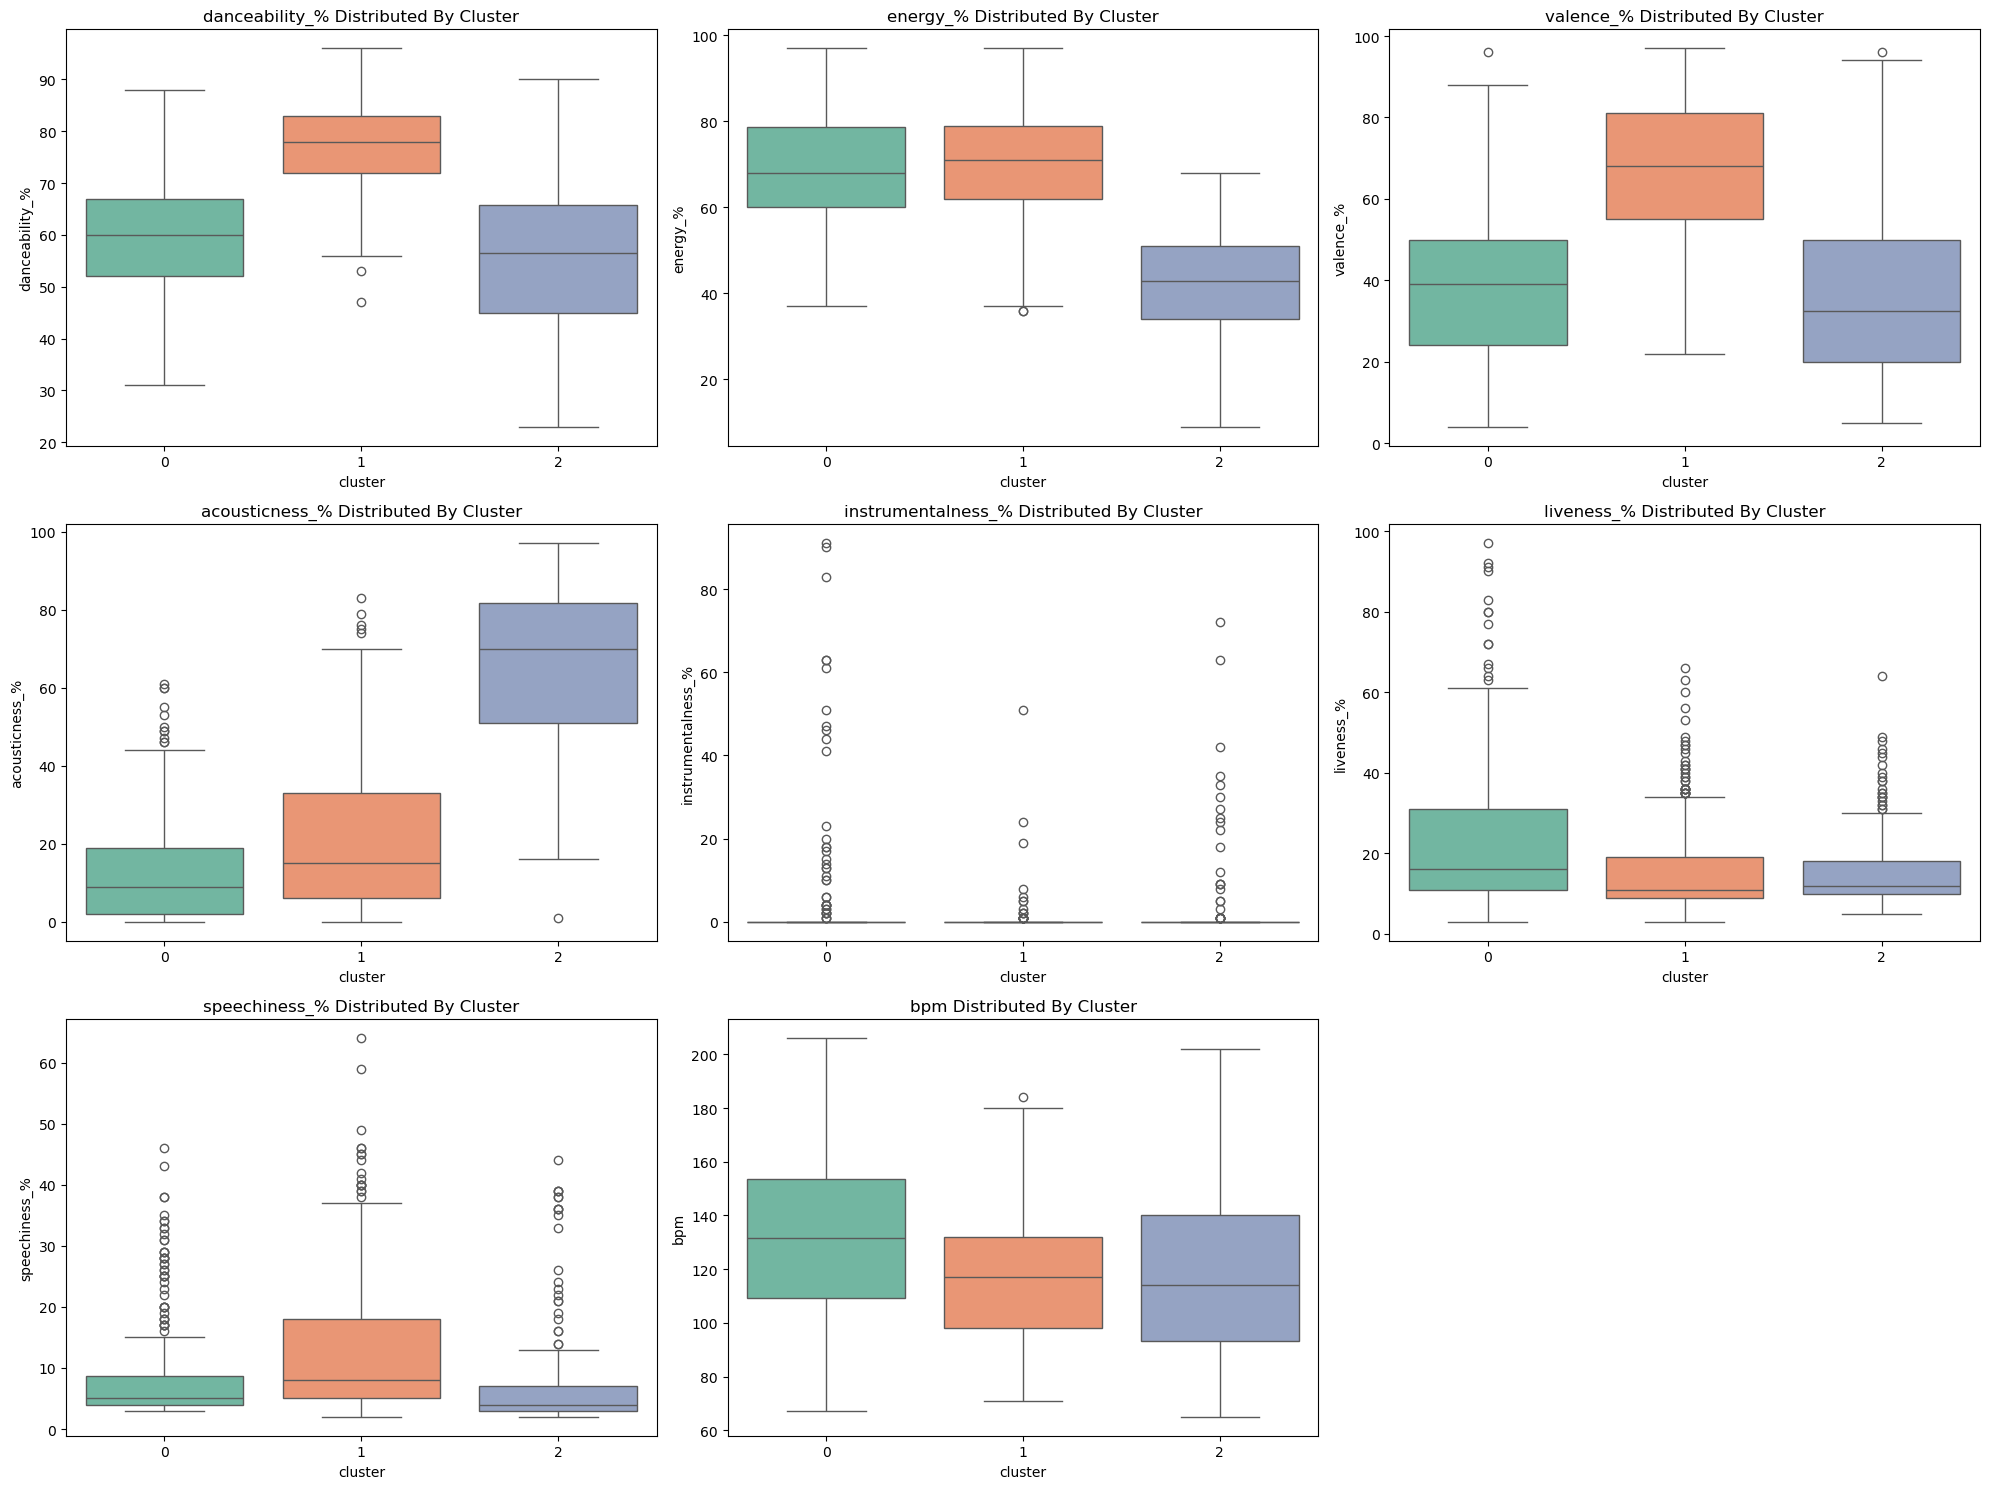

In [ ]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(featureForClustering, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='cluster', y=feature, palette='Set2')
    plt.title(f'{feature} Distributed By Cluster')
    plt.xlabel('cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()